In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [14]:
numeric_cols=df.select_dtypes(include=['float64', 'int64']).columns.tolist()
desc_stats=df[numeric_cols].describe().T
desc_stats['mode']=df[numeric_cols].mode().iloc[0]
desc_stats

,count,mean,std,min,25%,50%,75%,max,mode
Volume,450.0,5.066667,4.231602,1.000000,3.000000,4.000000,6.000000,31.000000,3.000000
Avg Price,450.0,10453.433333,18079.904840,290.000000,465.000000,1450.000000,10100.000000,60100.000000,400.000000
Total Sales Value,450.0,33812.835556,50535.074173,400.000000,2700.000000,5700.000000,53200.000000,196400.000000,24300.000000
Discount Rate (%),450.0,15.155242,4.220602,5.007822,13.965063,16.577766,18.114718,19.992407,5.007822
Discount Amount,450.0,3346.499424,4509.902963,69.177942,460.459304,988.933733,5316.495427,25738.022194,69.177942
Net Sales Value,450.0,30466.336131,46358.656624,326.974801,2202.208645,4677.788059,47847.912852,179507.479049,326.974801


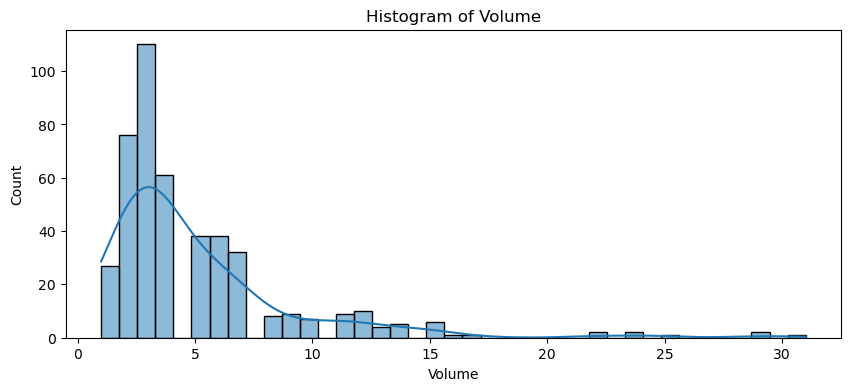

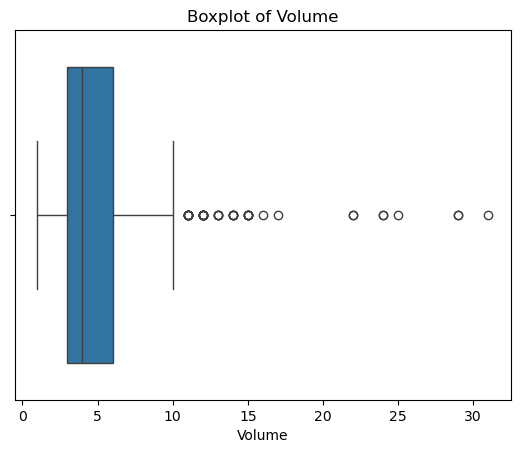

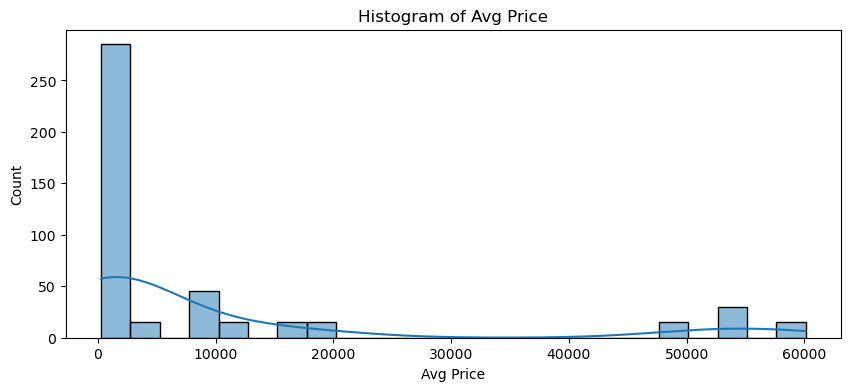

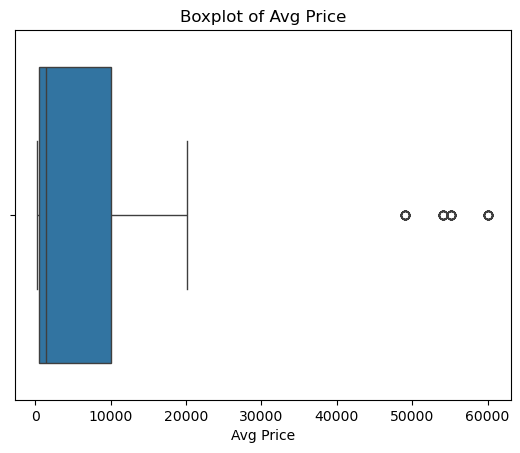

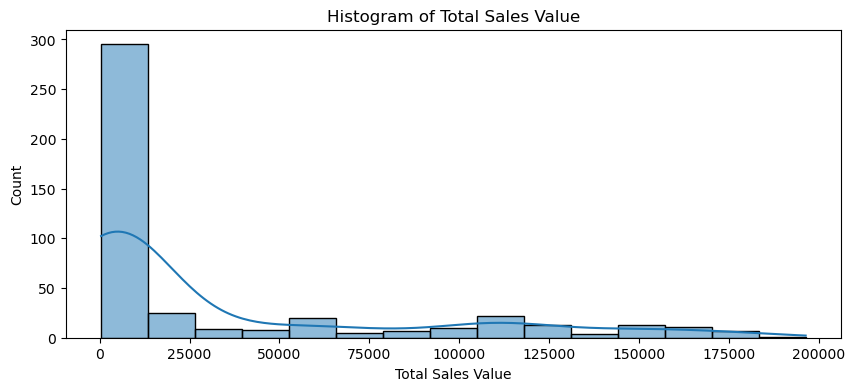

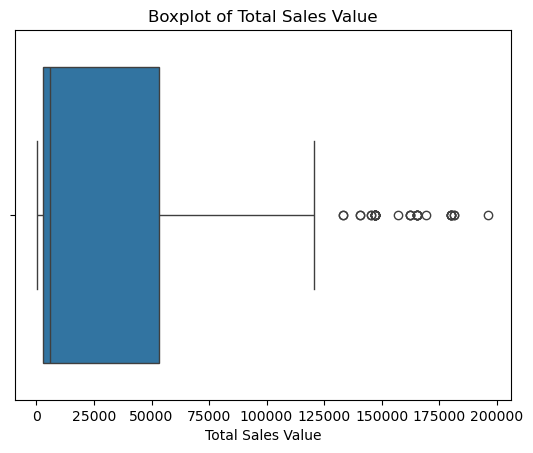

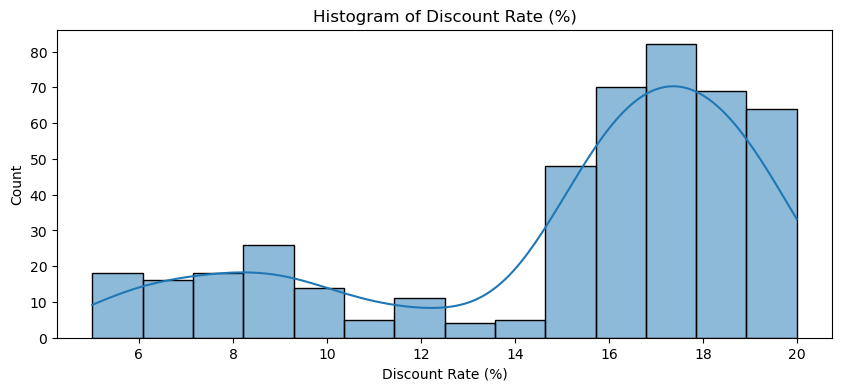

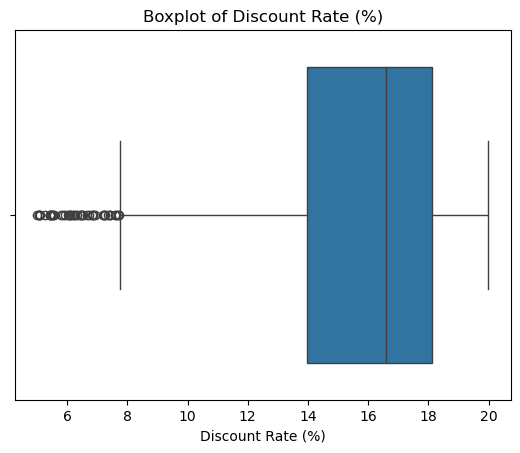

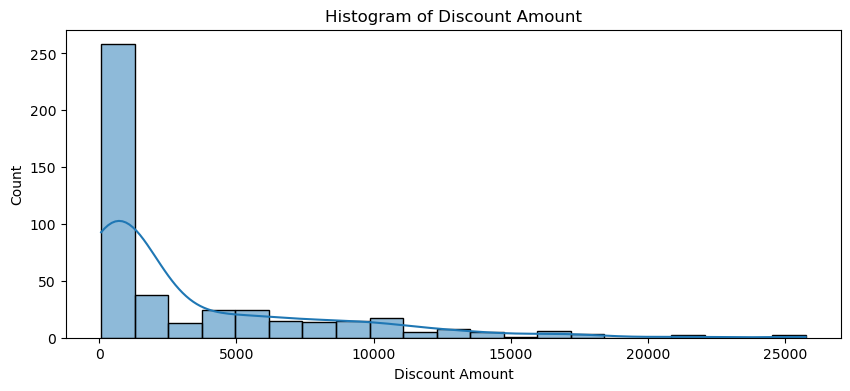

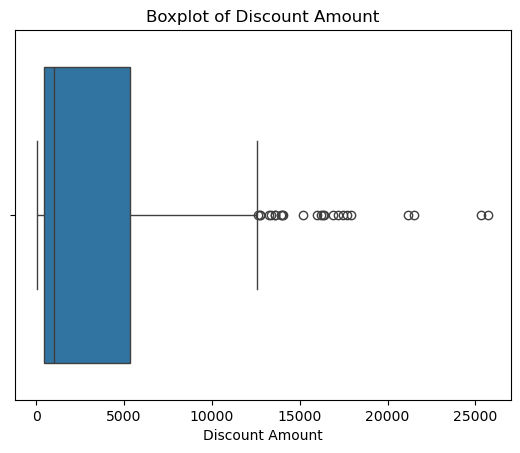

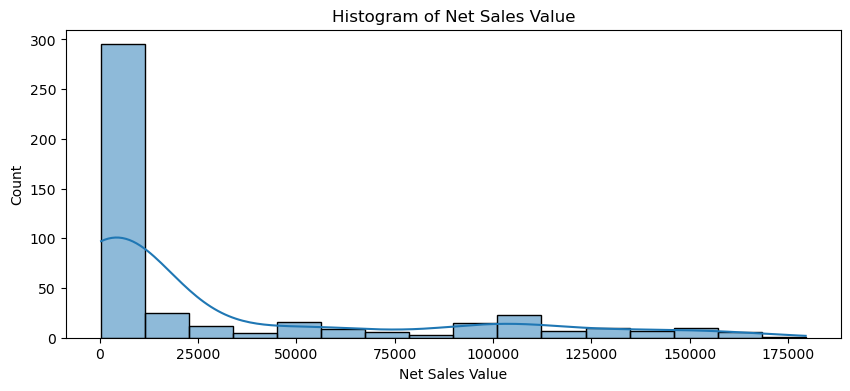

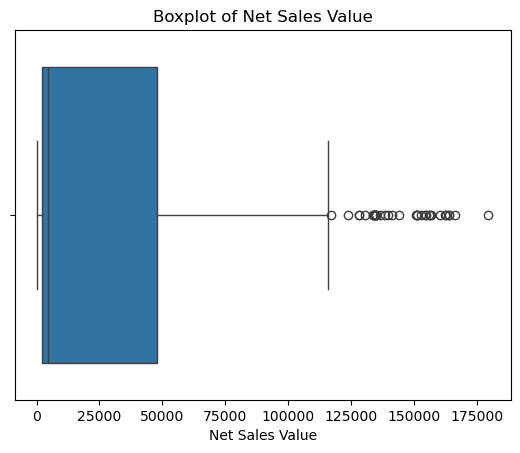

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col],kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

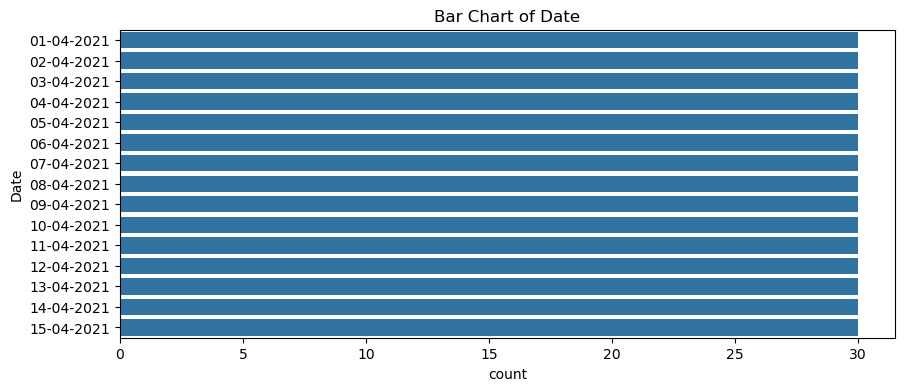

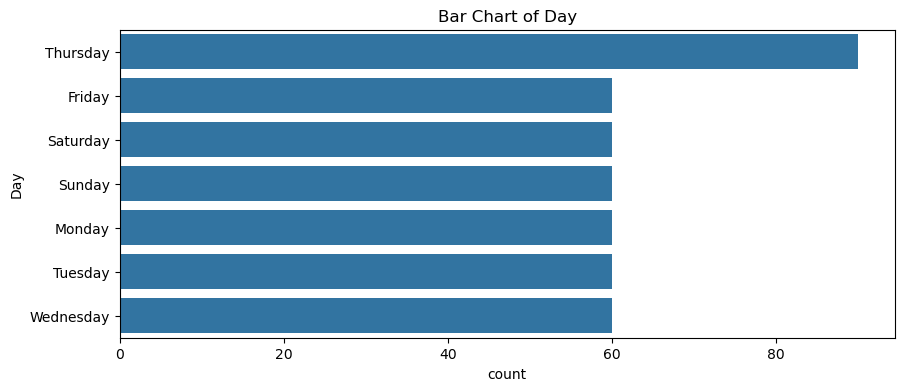

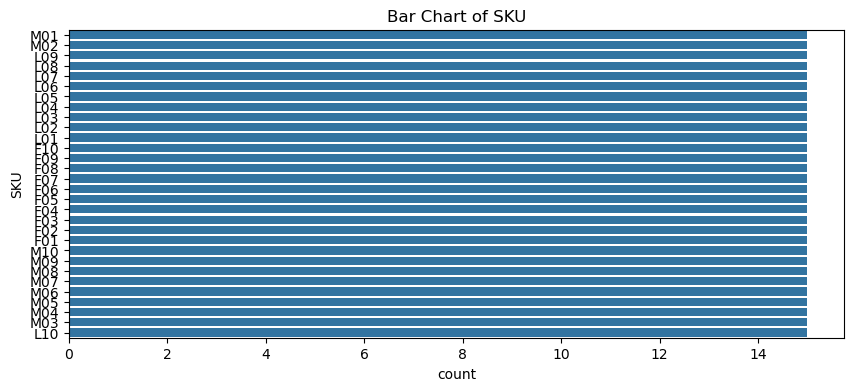

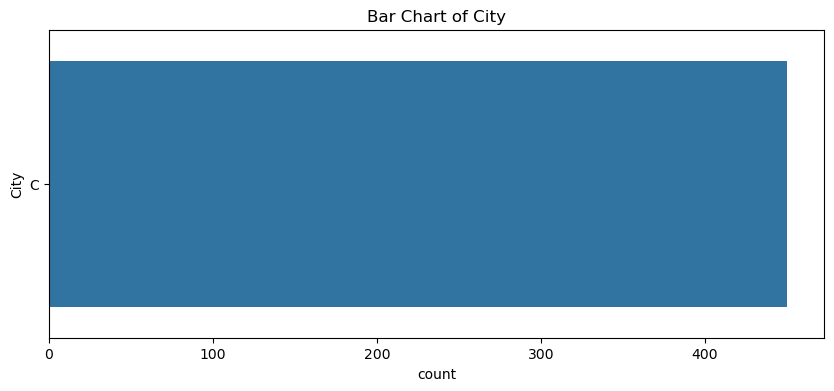

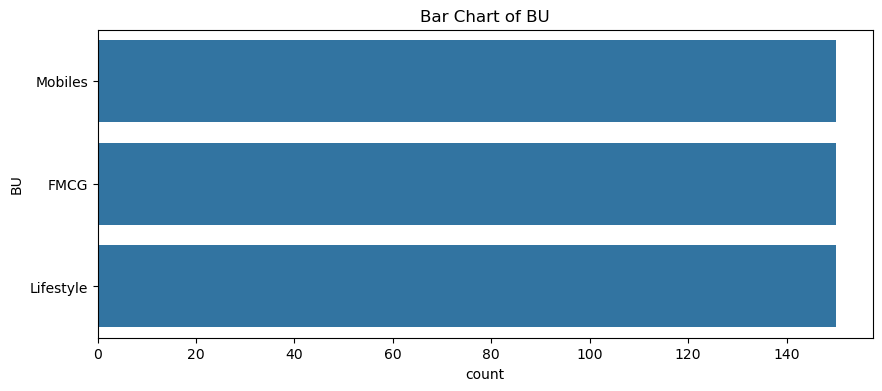

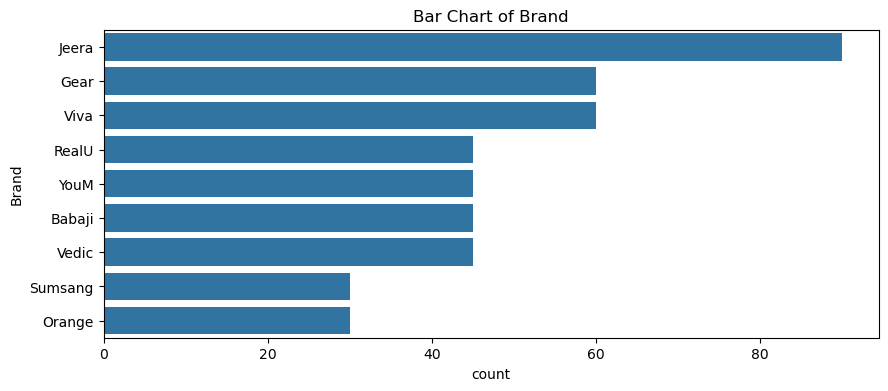

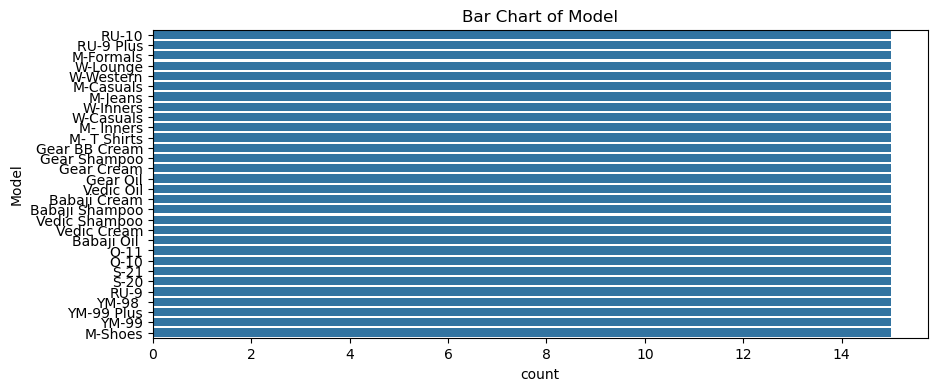

In [16]:
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.show()

In [17]:
df_cleaned=df.copy()
for col in numeric_cols:
    Q1=df_cleaned[col].quantile(0.25)
    Q3=df_cleaned[col].quantile(0.75)
    IQR=Q3 - Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df_cleaned=df_cleaned[(df_cleaned[col]>=lower)&(df_cleaned[col]<=upper)]
df_cleaned.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.936975,980.218487,3179.588235,17.430497,554.800839,2624.787396
std,2.164203,753.314579,1969.705407,1.416447,347.822432,1626.524791
min,1.000000,290.000000,400.000000,15.023751,69.177942,326.974801
25%,2.000000,450.000000,1560.000000,16.279559,275.581434,1278.193451
50%,3.000000,560.000000,2895.000000,17.407452,489.289226,2346.553482
75%,5.000000,1300.000000,4500.000000,18.596580,773.812489,3671.568748
max,10.000000,3100.000000,9300.000000,19.992407,1643.479617,7758.318962


In [18]:
df_standardized=df_cleaned.copy()
for col in numeric_cols:
    df_standardized[col]=(df_cleaned[col]-df_cleaned[col].mean())/df_cleaned[col].std()
df_standardized[numeric_cols].head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
11,0.029122,-0.902967,-1.005017,-0.601633,-1.023111,-0.998280
12,0.029122,-0.783495,-0.822249,0.514605,-0.780611,-0.828806
13,2.339441,-0.683935,0.510438,0.761773,0.631995,0.482987
14,0.491186,-0.916242,-0.878095,-1.351203,-0.948215,-0.860594
15,0.491186,-0.703847,-0.471943,0.487439,-0.422859,-0.481092


In [19]:
df_encoded=pd.get_dummies(df_cleaned,columns=categorical_cols)
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_M-Formals,Model_M-Jeans,Model_M-Shoes,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western
11,4,300,1200,16.578316,198.939790,1001.060210,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
12,4,390,1560,18.159408,283.286766,1276.713234,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13,9,465,4185,18.509508,774.622896,3410.377104,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,5,290,1450,15.516591,224.990564,1225.009436,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,5,450,2250,18.120928,407.720888,1842.279112,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
